## Verificación de modelos con años del 2000 al 2011

Descripción

#### Leemos los datos:

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import mean_squared_error
from sklearn.externals import joblib

import sys
import warnings
pd.options.mode.chained_assignment = None 
from datetime import datetime

In [2]:
contaminante = "PM10"
contaminante1 = "PM10mean"

In [3]:
path_datasets = str("./verifcacion_modelos_"+ contaminante1 + ".csv")

df_contaminante = pd.read_csv(path_datasets)
df_contaminante['fecha'] = pd.to_datetime(df_contaminante['fecha'], format='%Y-%m-%d %H:%M:%S')

Creamos una columna con el año de la medición

In [4]:
df_contaminante["anio"] = [row["fecha"].year for index, row in df_contaminante.iterrows()]

In [5]:
list_years =  [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,2009,2010,2011,2012,2013,2014] 

Diccionario de Df´s de cada anio:

In [6]:
data_year = {}
for year in list_years:
    data_year[year] = df_contaminante[df_contaminante["anio"]==year]
    data_year[year].drop(["fecha","anio"],inplace=True,axis=1)

#### Verificación de modelos

In [7]:
dirección_modelos = "/DATA/paw/jupyterhub_notebook/daniel.bustillos/DanielBustillos/contaminación/pipeline-norberto/entrenamiento_sin_persistencia/modelos/"
conta = 'PM10'
contaminante ="PM10"

In [8]:
model = [0 for col in range(24)]
for i in range(0,24):
    model[i] = joblib.load(str(dirección_modelos + conta +'/' + conta+'_'+str(i+1)+'hora.pkl'))

[17:07:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

##### Separamos el target del conjunto:

In [9]:
target = str(contaminante1 + "_max_frcst_")

In [10]:
lista = []
for i in range(1,25):
    lista.append(str(target+str(i)))

In [11]:
def rmse_year(year,hora_pronostico):    
    #print(year)
    hora = hora_pronostico
    rmse_list = []
    dataset = data_year[year].copy()
    #dataset.drop(["fecha"],axis=1,inplace=True)
    dataset.dropna(inplace=True)
    
    

    X = dataset.loc[:, dataset.columns != str(target+str(hora))]
    Y = dataset[str(target+str(hora))]
    #print(str(target+str(hora)))

    X.drop(lista[hora:],axis=1,inplace=True)
    if hora != 1:
        X.drop(lista[:hora-1],axis=1,inplace=True)


    pronostico = model[hora_pronostico-1].predict(X)

    rmse = round(np.sqrt(mean_squared_error(Y, pronostico)),3)
    #ploter(Y,X,pronostico,model[hora_pronostico-1])
    return rmse

Generar RMSE por año y horas de pronóstico

In [12]:
anios_intervalo = [key for key in data_year.keys()]

In [13]:
rmse_dic = {}

for year in range(2003,2015):
    print(year)
    rmse_dic[year] = [rmse_year(year,horas_pronostico) for horas_pronostico in range(1,25)]

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014


DF de rmse

In [14]:
df_rmse = pd.DataFrame(np.nan, index=[horas_pronostico for horas_pronostico in range(1,25)],
                       columns=[str(year) for year in range(2003,2015)])

In [15]:
for year in range(2003,2015):
    df_rmse[str(year)] = rmse_dic[year]

In [16]:
df_rmse = df_rmse.reset_index().rename(columns={'index': 'horas'})
df_rmse["horas"] =df_rmse["horas"].astype("str")

In [17]:
df_rmse.head()

,horas,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,1,6.821,5.303,5.934,6.618,5.961,4.887,4.750,6.548,5.261,3.458,3.484,2.792
1,2,8.198,6.230,7.329,8.216,7.613,5.565,5.000,6.746,5.855,4.907,4.534,3.839
2,3,9.990,7.410,9.109,9.876,9.285,6.991,6.113,7.732,7.429,6.116,5.761,4.998
3,4,11.813,8.192,10.554,11.141,10.801,8.199,6.994,9.241,8.888,7.191,6.858,5.924
4,5,13.047,9.109,11.518,12.152,11.537,8.826,7.609,9.859,9.627,8.069,7.619,6.660


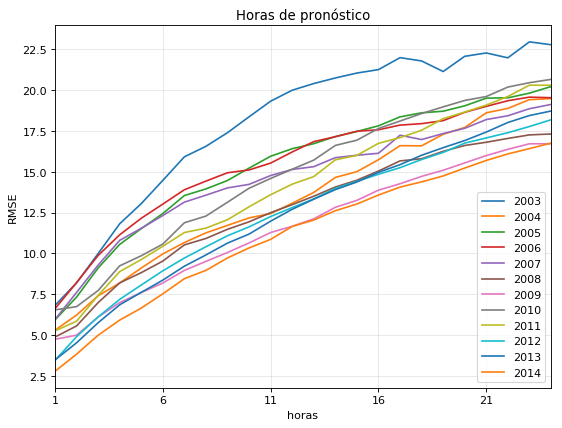

In [18]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca()

# df_export.(50).plot(x="fecha", y=[ "O3_y"],ax=ax,label=["O3 Medido"],color="dodgerblue")
# df_export.(60).head(100).plot(x="fecha", y=["O3_y_frcst_6"],ax=ax,label=["Pronóstico O3 a 12 horas"],color='darkblue',dashes=[6, 2])

[df_rmse.plot(x="horas", y=[str(year)],ax=ax) for year in range(2003,2015)]
plt.ylabel("RMSE")
plt.title("Horas de pronóstico")


# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.01)
ax.grid(which='major', alpha=0.3)



plt.legend()
plt.show()

In [20]:
df_rmse.style.background_gradient(cmap='coolwarm')

,horas,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,1,6.821,5.303,5.934,6.618,5.961,4.887,4.75,6.548,5.261,3.458,3.484,2.792
1,2,8.198,6.23,7.329,8.216,7.613,5.565,5,6.746,5.855,4.907,4.534,3.839
2,3,9.99,7.41,9.109,9.876,9.285,6.991,6.113,7.732,7.429,6.116,5.761,4.998
3,4,11.813,8.192,10.554,11.141,10.801,8.199,6.994,9.241,8.888,7.191,6.858,5.924
4,5,13.047,9.109,11.518,12.152,11.537,8.826,7.609,9.859,9.627,8.069,7.619,6.66
5,6,14.467,9.97,12.441,13.018,12.317,9.534,8.191,10.572,10.438,8.937,8.368,7.529
6,7,15.91,10.667,13.541,13.897,13.14,10.525,8.963,11.877,11.279,9.719,9.221,8.458
7,8,16.553,11.261,13.949,14.425,13.565,10.917,9.516,12.287,11.55,10.41,9.909,8.965
8,9,17.388,11.718,14.462,14.936,14.01,11.478,10.059,13.133,12.065,11.084,10.633,9.727
9,10,18.358,12.174,15.219,15.108,14.226,11.936,10.645,13.989,12.853,11.625,11.185,10.336


In [21]:
hora = 12

dataset = data_year[2013].copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

X = dataset.loc[:, dataset.columns != str(target+str(hora))]
Y = dataset[str(target+str(hora))]
print(str(target+str(hora)))

X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)


PM10mean_max_frcst_12


In [22]:
def ploter(anio, hora):
    modelo = model[hora-1]
    dataset = data_year[int(str(anio))].copy()
    dataset.dropna(inplace=True)

    X_test_0 = dataset.loc[:, dataset.columns != str(target+str(hora))]
    y_test_0 = dataset[str(target+str(hora))]
    print(str(target+str(hora)))

    X_test_0.drop(lista[hora:],axis=1,inplace=True)
    if hora != 1:
        X_test_0.drop(lista[:hora-1],axis=1,inplace=True)
  
    pronosticados_0 = modelo.predict(X_test_0)
    plt.scatter(y_test_0, pronosticados_0,alpha=0.5,color="royalblue")
    
    score = round(modelo.score(X_test_0, y_test_0),3)
    rmse = round(np.sqrt(mean_squared_error(y_test_0, pronosticados_0)),3)
    
    
    plt.plot([30,130],[30,130],color="k",linestyle='--')
    
    plt.axhline(y=150, color='k', linestyle='--')
    plt.axvline(x=150, color='k', linestyle='--')
    plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate("Score ="+str(score), (15,139), xytext = (15, 139 + 1), 
                  horizontalalignment='left')
    plt.annotate("RMSE ="+str(rmse), (15,119), xytext = (15, 119 + 1), 
                  horizontalalignment='left')
    
    
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.title('XGBoost Predicted vs Actual')
    plt.show()

PM10mean_max_frcst_11


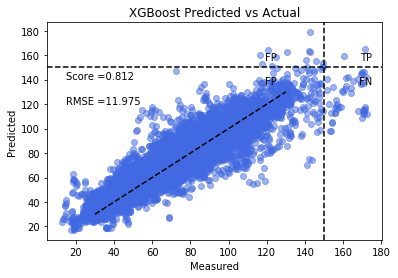

In [29]:
ploter(str(2013),11)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34a828bc50>]],
      dtype=object)

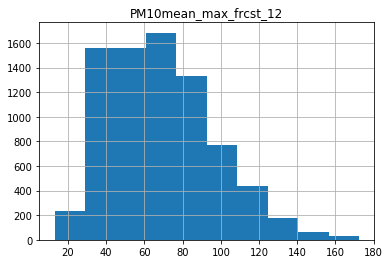

In [32]:
dataset.hist(column='Trip_distance')dataset[str(target+str(hora))]

In [34]:
import seaborn as sns

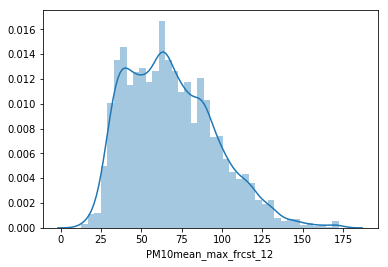

In [35]:
sns.distplot(dataset[str(target+str(hora))])